In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('../src/data/marketing_campaign_cleaned.csv', index_col=[0])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,1,83894400000000000,64,1617,Alone,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,10800000000000000,67,27,Alone,2,3,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,40780800000000000,56,776,Partner,0,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,5616000000000000,37,53,Partner,1,3,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,27734400000000000,40,422,Partner,1,3,1


In [84]:
px.histogram(df, x='Education', color='Education')

<AxesSubplot:xlabel='Living_With', ylabel='count'>

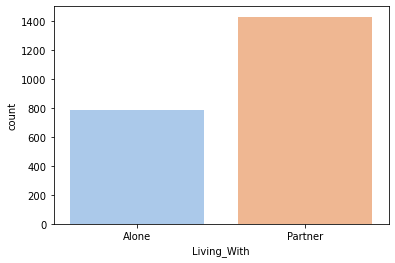

In [85]:
sns.countplot(x=df['Living_With'], palette='pastel')

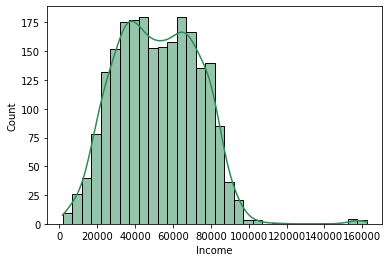

In [86]:
sns.histplot(df['Income'], kde=True, color='seagreen');

In [87]:
sunburst_df = df[['Education', 'Living_With']]

fig = px.sunburst(sunburst_df, path=['Living_With', 'Education'])
fig.show()

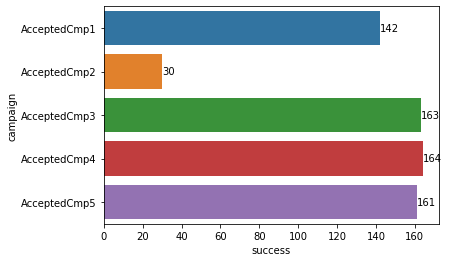

In [88]:
campaigns_df = pd.melt(df, value_vars=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], var_name='campaign', value_name='success', ignore_index=True)
success_df = campaigns_df[campaigns_df.success == 1]

plot = sns.barplot(data=success_df, x='success', y='campaign', ci=None, estimator=np.sum)
plot.bar_label(plot.containers[0]);

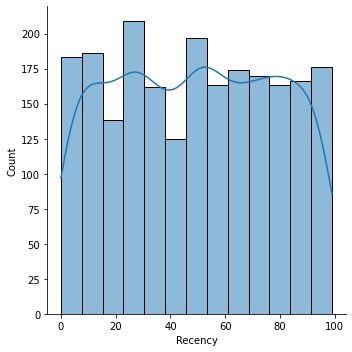

In [89]:
sns.displot(df['Recency'], kde=True);

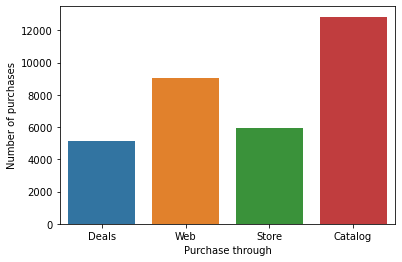

In [90]:
source_purchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index().rename(columns={0: 'sum'})

sns.barplot(x=source_purchases.index, y=source_purchases['sum'])
plt.gca().set_xticklabels(['Deals', 'Web', 'Store', 'Catalog'])
plt.xlabel('Purchase through')
plt.ylabel('Number of purchases');

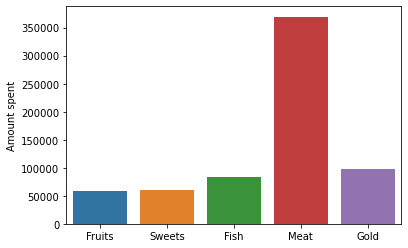

In [91]:
spendings_per_product = df[['MntFruits', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntGoldProds']].sum().reset_index().rename(columns={0: 'sum'})

sns.barplot(x=spendings_per_product.index, y=spendings_per_product['sum'])
plt.gca().set_xticklabels(['Fruits', 'Sweets', 'Fish', 'Meat', 'Gold'])
plt.ylabel('Amount spent');

In [92]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_For', 'Age', 'Spent',
       'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [93]:
campaigns_cols = [col for col in df.columns if 'Cmp' in col]
df['TotalCmpAcc'] = df[campaigns_cols].sum(axis=1)

In [94]:
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Is_Parent']
mnt_cols = [col for col in df.columns if 'Mnt' in col]
channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalCmpAcc']

In [95]:
pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Spent'])

/var/folders/tt/sv9fnlz53v1fhl_jq2jxkbk00000gn/T/ipykernel_67513/2032339422.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Average
Year_Birth,1968.9
Income,51958.8
Kidhome,0.4
Teenhome,0.5
Recency,49.0
Spent,607.3


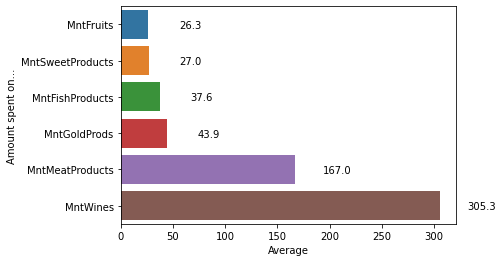

In [96]:
spendings = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

ax = sns.barplot(data=spendings, x='Average', y='index',)
plt.ylabel('Amount spent on...')

for p, q in zip(ax.patches, spendings['Average']):
  ax.text(x=q + 40, y=p.get_y() + 0.5, s=q, ha="center")

In [97]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_For', 'Age', 'Spent',
       'Living_With', 'Children', 'Family_Size', 'Is_Parent', 'TotalCmpAcc'],
      dtype='object')

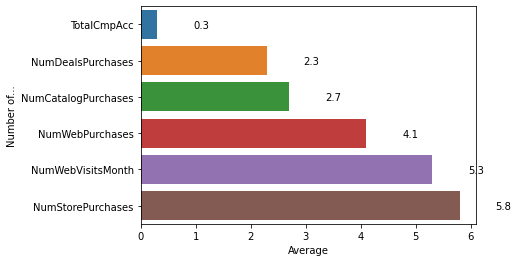

In [98]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

ax = sns.barplot(data=channels, x='Average', y='index')
plt.ylabel('Number of...')
for p,q in zip(ax.patches, channels['Average']):
  ax.text(x=q+0.8, y=p.get_y()+0.5, s=q, ha="center");

In [99]:
# df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

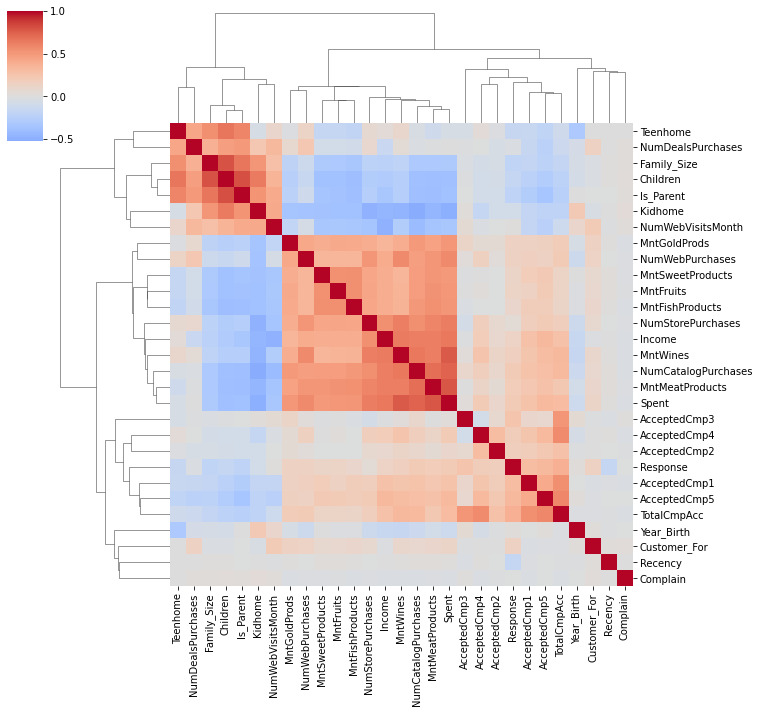

In [108]:
corr = df.drop(columns=['ID', 'Age']).select_dtypes(include=np.number).corr(method='kendall')
sns.clustermap(corr, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

From this heatmap we can observe the following clusters of correlated featuers: <br />

The high income cluster:
  - Amount spent and number of purchases are positively correlated with income
  - Purchasing in store, on the web or via the catalog is postiveley correlated with income

The have kids & teens:
  - Amount spend and number of purchases are negatively correlated with children
  - Purchasing deals is positively correlated with children

The advertising campaigns:
  - Acceptance of the advertising campaigns are strongly correlated with each other
  - Weak positive correlation of the advertising campaigs is seen with the high income cluster, and weak negative correlation is seen with the have kids & teens cluster


#### What factors are significantly related to the number of store purchases?

<AxesSubplot:xlabel='NumStorePurchases', ylabel='Count'>

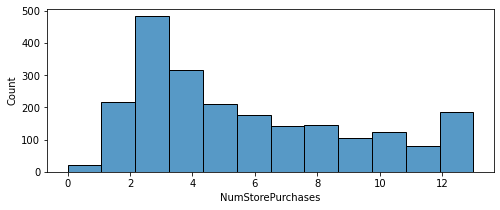

In [103]:
plt.figure(figsize=(8, 3))
sns.histplot(df['NumStorePurchases'], kde=False, bins=12)

In [104]:
import statsmodels.api as sm
import scipy.stats as st
glm_df = df.drop(columns=['ID', 'Dt_Customer', 'Living_With', 'TotalCmpAcc', 'Family_Size', 'Is_Parent', 'Kidhome', 'Teenhome', 'Customer_For'])
glm_df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children
0,1957,Graduation,Single,58138.0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,64,1617,0
1,1954,Graduation,Single,46344.0,38,11,1,6,2,1,...,0,0,0,0,0,0,0,67,27,2
2,1965,Graduation,Together,71613.0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,56,776,0
3,1984,Graduation,Together,26646.0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,37,53,1
4,1981,PhD,Married,58293.0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,40,422,1


## Conclusions

Overall the advertising campaings are successful. They are positiveley correlated with income and negativeley correlated with having children.
  - Create targeted advertising campaigns, one aimed at high income customers withoud kids and another aimed at lower income individuals with kids/teens


The underperforming channels are deals and catalog purchases (i.e. the average customer made the fewest purchases via these channels). 
- The advertising campaings should be more focused on the successful channels to reach more clients